In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json

In [2]:
RANDOM_STATE=42

In [3]:
metrics_summary = {}
best_config = []

In [4]:
def agglomerative_clustering_get_number_of_clusters(link, l, dataset_num):
  dn = dendrogram(link)
  plt.title(f'Дендрограмма (linkage={l})')
  plt.xlabel('Объекты или кластеры')
  plt.ylabel('Расстояние')
  plt.savefig(f'artifacts/figures/dendrogram_{l}_dataset{dataset_num}.png')
  plt.show()
  return int(input("Введите выбранное число кластеров:"))


def agglomerative_clustering(data, linkage_types=[], dataset_num=1):
  results = []
  for l in linkage_types:
    print(f'Аггломеративнная кластеризация (linkage={l}):')
    link = linkage(data, l)
    k = agglomerative_clustering_get_number_of_clusters(link, l, dataset_num)
    AC = AgglomerativeClustering(n_clusters=k, linkage=l)
    labels = AC.fit_predict(data)
    result = {
        'sil_score' : float(silhouette_score(data, labels)),
        'db_score': float(davies_bouldin_score(data, labels)),
        'ch_score': float(calinski_harabasz_score(data, labels))
    }
    print(result)
    print('*'*200)
    results.append(result)
  return results


In [5]:
def Kmeans_get_number_of_clusters(data, dataset_num):
  n_clusters = range(2, 21)
  scores = []
  for k in n_clusters:
    model = KMeans(n_clusters=k, n_init=1, random_state=RANDOM_STATE)
    labels = model.fit_predict(X)
    scores.append(silhouette_score(data, labels))
  plt.plot(n_clusters, scores, marker='o')
  plt.title('silhouette vs k')
  plt.xlabel('Число кластеров')
  plt.xticks(n_clusters)
  plt.ylabel('Коэффициент силиэта')
  plt.savefig(f'artifacts/figures/silhouette_vs_k_.dataset{dataset_num}.png')
  plt.show()
  return int(input("Введите выбранное число кластеров:"))

def KMeans_clustering(data, dataset_num=1):
  print('K-means кластеризация:')
  k = Kmeans_get_number_of_clusters(data, dataset_num)
  KM = KMeans(n_clusters=k, n_init=1, random_state=RANDOM_STATE)
  labels = KM.fit_predict(data)
  result = {
    'sil_score' : float(silhouette_score(data, labels)),
    'db_score': float(davies_bouldin_score(data, labels)),
    'ch_score': float(calinski_harabasz_score(data, labels))
  }
  print(result)
  return result

In [6]:
def best_clustering_show(model, data, dataset_num=1):
  pca = PCA(n_components=2, random_state=RANDOM_STATE)
  X_pca = pca.fit_transform(data)

  labels = model.fit_predict(data)
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
  plt.title('Результат кластеризации')
  plt.savefig(f'artifacts/figures/clustering_.dataset{dataset_num}.png')
  plt.show()

  return labels

# Первый датасет

In [7]:
data1 = pd.read_csv("data/S07-hw-dataset-01.csv")
data1.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [8]:
data1.info() #Нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [9]:
data1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [10]:
sample_id = data1['sample_id']
X = data1.drop('sample_id', axis=1)

**Предобработка**

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Аггломеративная кластеризация**

Аггломеративнная кластеризация (linkage=ward):


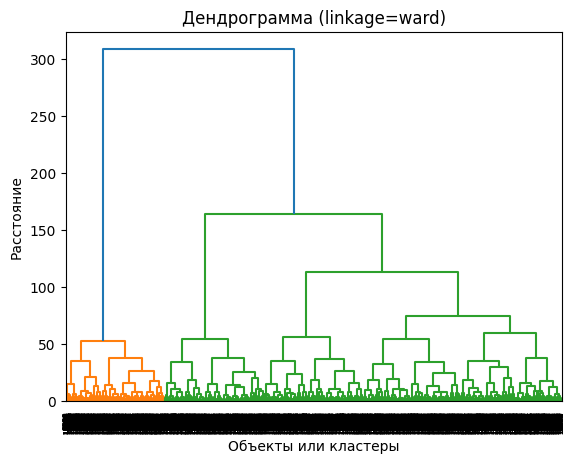

Введите выбранное число кластеров:2
{'sil_score': 0.5216395622404242, 'db_score': 0.6853295219054457, 'ch_score': 11786.954622671532}
********************************************************************************************************************************************************************************************************
Аггломеративнная кластеризация (linkage=complete):


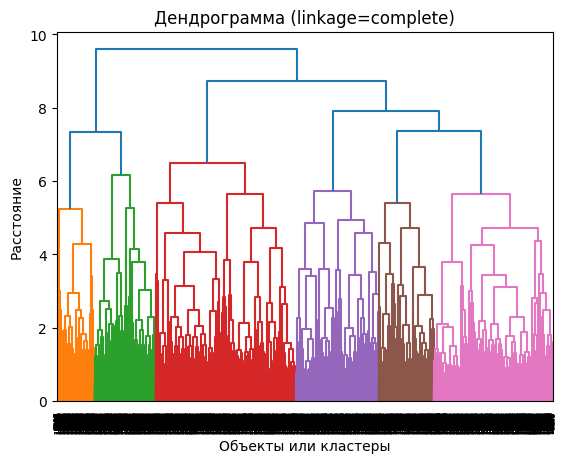

Введите выбранное число кластеров:5
{'sil_score': 0.18971915819359067, 'db_score': 2.127002745158304, 'ch_score': 4482.5076678668565}
********************************************************************************************************************************************************************************************************


In [12]:
ag_results = agglomerative_clustering(X, ['ward', 'complete'], dataset_num=1)

**Метод k-средних**

K-means кластеризация:


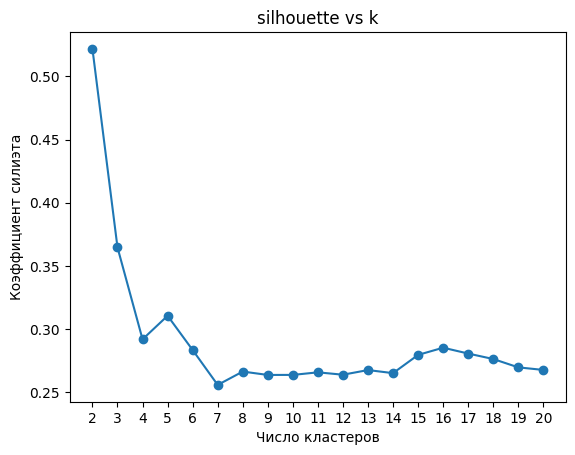

Введите выбранное число кластеров:2
{'sil_score': 0.5216395622404242, 'db_score': 0.6853295219054457, 'ch_score': 11786.954622671532}


In [13]:
km_result = KMeans_clustering(X, dataset_num=1)

Лучшее решение - K-средних

**Визуализация и артефакты**

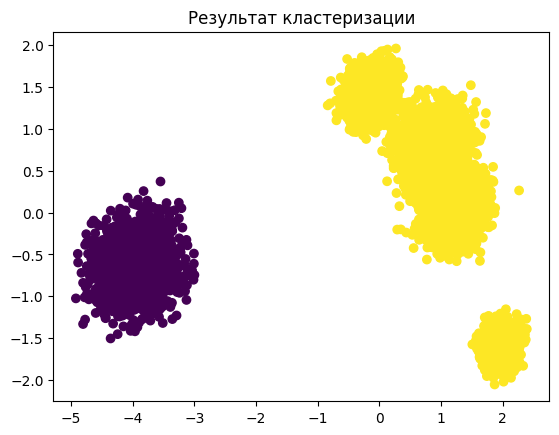

In [14]:
best_model = KMeans(n_clusters=2, n_init=1, random_state=RANDOM_STATE)
labels = best_clustering_show(best_model, X, 1)

In [15]:
labels_hw07_ds1 = sample_id.to_frame()
labels_hw07_ds1['cluster_label'] = pd.Series(labels)
labels_hw07_ds1.to_csv('artifacts/labels/labels_hw07_ds1.csv', index=False, header=True)

In [16]:
metrics_summary['dataset_1_agglomaerative_ward'] = ag_results[0]
metrics_summary['dataset_1_agglomaerative_complete'] = ag_results[1]
metrics_summary['dataset_1_kmeans_2'] = km_result

In [17]:
best_config.append({
    'dataset_num': 1,
    'clustering_method': 'KMeans',
    'n_clusters': 2,
    'criterion': 'silhouette_score'
})

# Второй датасет

In [18]:
data2 = pd.read_csv("data/S07-hw-dataset-02.csv")
data2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [19]:
data2.info()# Нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [20]:
data2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [21]:
sample_id = data2['sample_id']
X = data2.drop('sample_id', axis=1)

**Предобработка**

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Аггломеративная кластеризация**

Аггломеративнная кластеризация (linkage=ward):


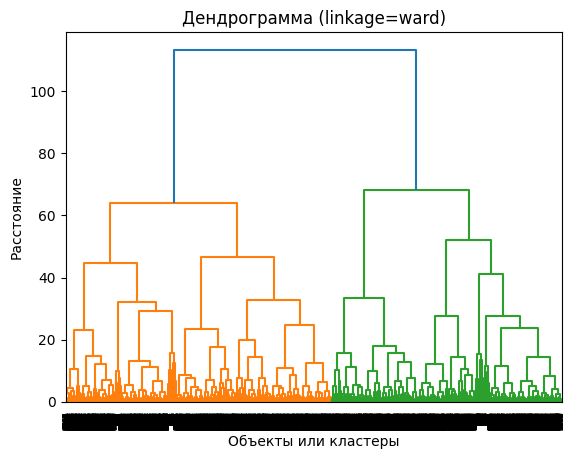

Введите выбранное число кластеров:2
{'sil_score': 0.2658744116185544, 'db_score': 1.4673684423118982, 'ch_score': 2929.7223479920044}
********************************************************************************************************************************************************************************************************
Аггломеративнная кластеризация (linkage=complete):


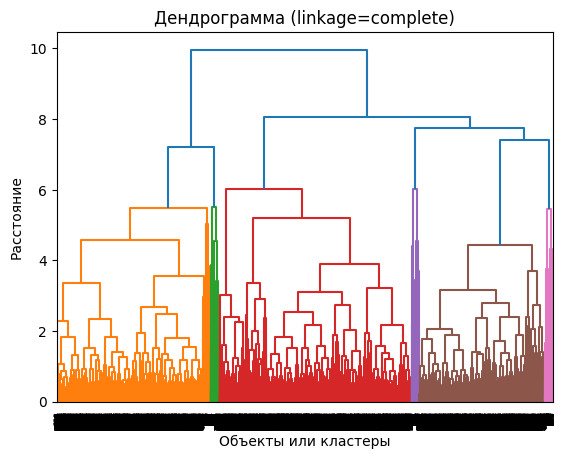

Введите выбранное число кластеров:6
{'sil_score': 0.21099663563046736, 'db_score': 1.1630438231616265, 'ch_score': 1382.6225571809425}
********************************************************************************************************************************************************************************************************


In [26]:
ag_results = agglomerative_clustering(X, ['ward', 'complete'], dataset_num=2)

**Метод k-средних**

K-means кластеризация:


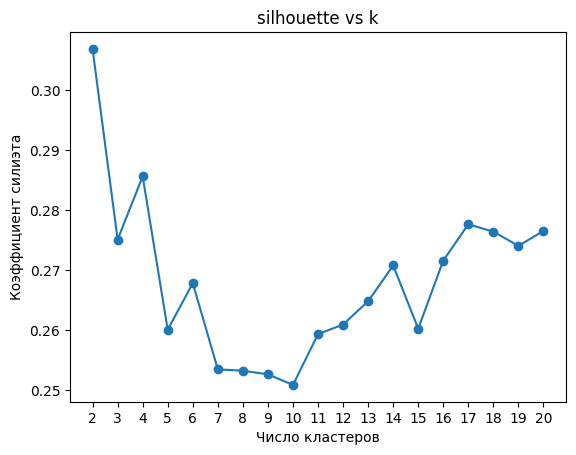

Введите выбранное число кластеров:2
{'sil_score': 0.3068610017701601, 'db_score': 1.3234721699867644, 'ch_score': 3573.3933329348392}


In [27]:
km_result = KMeans_clustering(X, dataset_num=2)

Лучшее решение - K-средних

**Визуализация и артефакты**

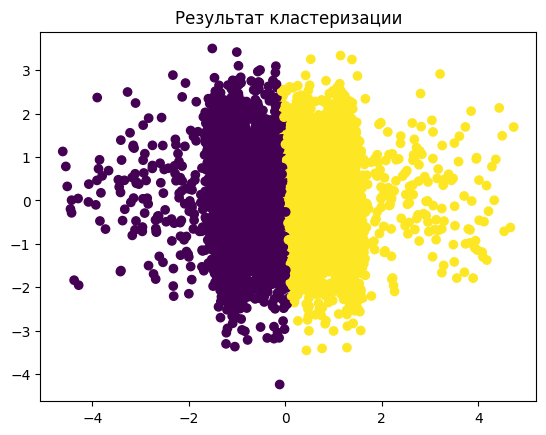

In [28]:
best_model = KMeans(n_clusters=2, n_init=1, random_state=RANDOM_STATE)
labels = best_clustering_show(best_model, X, 2)

In [29]:
labels_hw07_ds2 = sample_id.to_frame()
labels_hw07_ds2['cluster_label'] = pd.Series(labels)
labels_hw07_ds2.to_csv('artifacts/labels/labels_hw07_ds2.csv', index=False, header=True)

In [30]:
metrics_summary['dataset_2_agglomaerative_ward'] = ag_results[0]
metrics_summary['dataset_2_agglomaerative_complete'] = ag_results[1]
metrics_summary['dataset_2_kmeans_2'] = km_result

In [31]:
best_config.append({
    'dataset_num': 2,
    'clustering_method': 'KMeans',
    'n_clusters': 2,
    'criterion': 'silhouette_score'
})

# Третий датасет

In [32]:
data3 = pd.read_csv("data/S07-hw-dataset-03.csv")
data3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [33]:
data3.info() #Нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [34]:
data3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [35]:
sample_id = data3['sample_id']
X = data3.drop('sample_id', axis=1)

**Предобработка**

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Аггломеративная кластеризация**

Аггломеративнная кластеризация (linkage=ward):


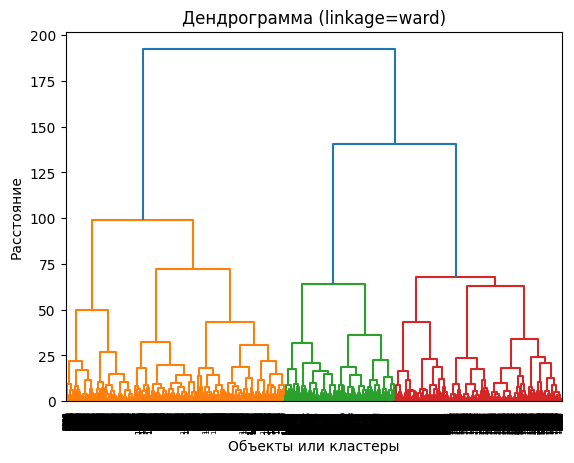

Введите выбранное число кластеров:3
{'sil_score': 0.30940029307932226, 'db_score': 1.1775936042245867, 'ch_score': 6705.577295073578}
********************************************************************************************************************************************************************************************************
Аггломеративнная кластеризация (linkage=complete):


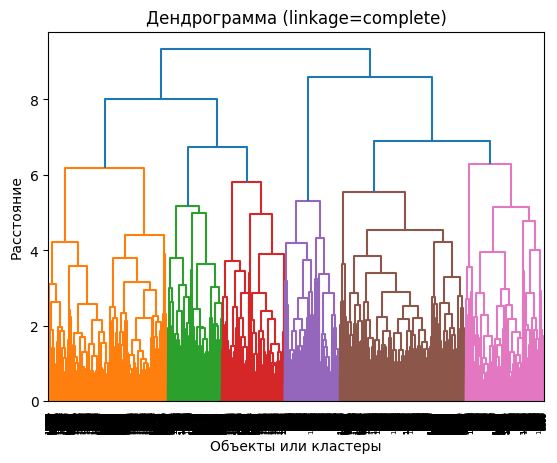

Введите выбранное число кластеров:4
{'sil_score': 0.12233355854285609, 'db_score': 1.637994295859694, 'ch_score': 3139.1681485451845}
********************************************************************************************************************************************************************************************************


In [37]:
ag_results = agglomerative_clustering(X, ['ward', 'complete'], dataset_num=3)

**Метод k-средних**

K-means кластеризация:


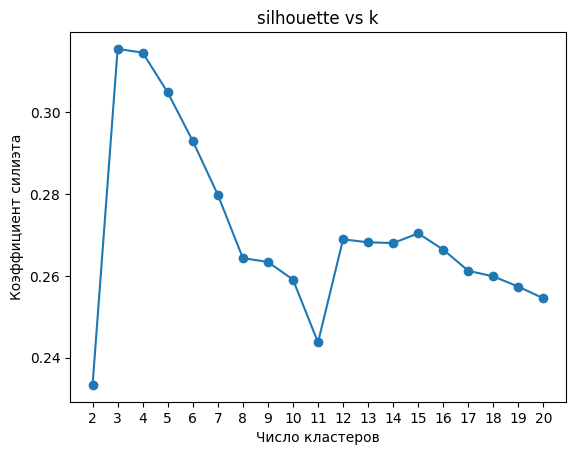

Введите выбранное число кластеров:3
{'sil_score': 0.31553248183109267, 'db_score': 1.1577832240211112, 'ch_score': 6957.158106946779}


In [38]:
km_result = KMeans_clustering(X, dataset_num=3)

Лучшее решение - K-средних

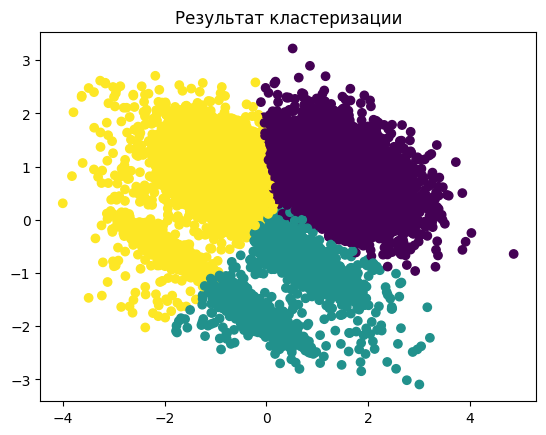

In [39]:
best_model = KMeans(n_clusters=3, n_init=1, random_state=RANDOM_STATE)
labels = best_clustering_show(best_model, X, 3)

In [40]:
labels_hw07_ds3 = sample_id.to_frame()
labels_hw07_ds3['cluster_label'] = pd.Series(labels)
labels_hw07_ds3.to_csv('artifacts/labels/labels_hw07_ds3.csv', index=False, header=True)

In [41]:
metrics_summary['dataset_3_agglomaerative_ward'] = ag_results[0]
metrics_summary['dataset_3_agglomaerative_complete'] = ag_results[1]
metrics_summary['dataset_3_kmeans_3'] = km_result

In [42]:
best_config.append({
    'dataset_num': 3,
    'clustering_method': 'KMeans',
    'n_clusters': 3,
    'criterion': 'silhouette_score'
})

In [43]:
with open("artifacts/metrics_summary.json", "w", encoding="utf-8") as f:
    json.dump(metrics_summary, f, ensure_ascii=False, indent=2)

In [44]:
with open("artifacts/best_configs.json", "w", encoding="utf-8") as f:
    json.dump(best_config, f, ensure_ascii=False, indent=2)